In [6]:
# =========================
# Phase 5 — Colab Sample Image Viewer
# =========================
# 0️⃣ Unmount any previous drive first
from google.colab import drive
drive.flush_and_unmount()  # cleanly unmount

# 1️⃣ Create a fresh empty folder for mounting
import os
mount_point = "/content/gdrive"
os.makedirs(mount_point, exist_ok=True)

# 2️⃣ Mount Google Drive to this empty folder
drive.mount(mount_point)

# ✅ All your paths must now use mount_point instead of /content/drive
train_dir = os.path.join(mount_point, "MyDrive/images/train")
print("Contents of train folder:", os.listdir(train_dir))

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/gdrive
Contents of train folder: ['03e0a9d3-2bcd0000.jpg', '6c0f4b52-fed90df4.jpg', '6b2591b3-1ccc5250.jpg', '99fda8cc-278dda16.jpg', '5d60f6d6-c3d50000.jpg', '1527bec6-44012e7b.jpg', '12a3bfc4-6c271e39.jpg', '16d131ad-238fde29.jpg', '68bbe388-a040087c.jpg', '20c18a94-e1f20000.jpg', '43df11a6-9bc50001.jpg', '367f0c7b-f212efea.jpg', '364e440d-00000000.jpg', '5f6e1cb5-c612b719.jpg', '2e1e3eaa-4ec6c5c9.jpg', '0cfec584-8ab90c1e.jpg', '713a5718-c0d5ec2d.jpg', '37fbe72b-f36170eb.jpg', '6529982b-aa168fc0.jpg', '64ea3319-1dfa83c2.jpg', '25499e28-d7489463.jpg', '7629ea51-1b296f6d.jpg', '76663911-826adbde.jpg', '8d28a4c4-447f48b0.jpg', '1c927be0-00a90000.jpg', '587e93da-9d2eef22.jpg', '45d7a5c3-bf5541c0.jpg', '5cd6c2d1-3307b49f.jpg', '127f8da7-4a206db8.jpg', '2d6c8b99-69b355b5.jpg', '040904fc-00000000.jpg', '60855380-49afeced.jpg', '61c2768a-7a530c0e.jpg', '5e910ef3-f1d1a8ea.jpg', '09cdd188-4e98738e.jpg', 'aea0d3f5-5f41e651.

Step 1 - Sample Image Viewer & Dashboard.

✅ sample_images folder ready at: /content/gdrive/MyDrive/Emach-Structures-ML-Portfolio/Phase5_Colab/sample_images
Copied 4 sample images.


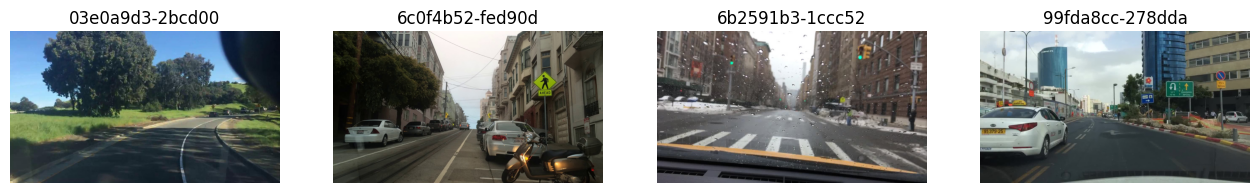

In [7]:
import os
import shutil
import matplotlib.pyplot as plt
from PIL import Image

# -------------------------
# 1️⃣ Paths
# -------------------------
base_phase5 = "/content/gdrive/MyDrive/Emach-Structures-ML-Portfolio/Phase5_Colab"
train_dir = "/content/gdrive/MyDrive/images/train"
sample_dir = os.path.join(base_phase5, "sample_images")

# -------------------------
# 2️⃣ Create sample_images folder if not exists
# -------------------------
os.makedirs(sample_dir, exist_ok=True)
print("✅ sample_images folder ready at:", sample_dir)

# -------------------------
# 3️⃣ Copy first 4 images from train folder to sample_images
# -------------------------
sample_files = os.listdir(train_dir)[:4]
for f in sample_files:
    shutil.copy(os.path.join(train_dir, f), sample_dir)

print(f"Copied {len(sample_files)} sample images.")

# -------------------------
# 4️⃣ Display the images in Colab
# -------------------------
images = [Image.open(os.path.join(sample_dir, f)) for f in sample_files]

fig, axes = plt.subplots(1, len(images), figsize=(16,4))
for ax, img, fname in zip(axes, images, sample_files):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(fname[:15])  # short title

plt.show()

Step 2 — CLIP-based Image Similarity Search in Colab

In [8]:
from transformers import CLIPProcessor, CLIPModel
import torch
from PIL import Image
import os

# -------------------------
# 1️⃣ Load CLIP model & processor
# -------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# -------------------------
# 2️⃣ Load sample images
# -------------------------
sample_files = os.listdir(sample_dir)
sample_images = [Image.open(os.path.join(sample_dir, f)).convert("RGB") for f in sample_files]

# -------------------------
# 3️⃣ Encode sample images
# -------------------------
inputs = clip_processor(images=sample_images, return_tensors="pt", padding=True).to(device)
with torch.no_grad():
    image_features = clip_model.get_image_features(**inputs)

# Normalize features for cosine similarity
image_features /= image_features.norm(dim=-1, keepdim=True)

# -------------------------
# 4️⃣ Query image (pick one from train folder)
# -------------------------
query_image_path = os.path.join(train_dir, sample_files[0])  # just example
query_image = Image.open(query_image_path).convert("RGB")
query_input = clip_processor(images=query_image, return_tensors="pt").to(device)

with torch.no_grad():
    query_features = clip_model.get_image_features(**query_input)
query_features /= query_features.norm(dim=-1, keepdim=True)

# -------------------------
# 5️⃣ Compute cosine similarity
# -------------------------
similarity = (query_features @ image_features.T).squeeze().cpu()
for f, score in zip(sample_files, similarity):
    print(f"{f}: {score.item():.4f}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

03e0a9d3-2bcd0000.jpg: 1.0000
6c0f4b52-fed90df4.jpg: 0.5770
6b2591b3-1ccc5250.jpg: 0.5936
99fda8cc-278dda16.jpg: 0.6719


Phase 5 — Visual Language Model (VLM) Evaluation & Similarity Scoring

Objective:

Use the pretrained CLIP model to encode images and compute similarity scores for image retrieval or ranking.

Steps Completed in Colab:

Mounted Google Drive to access all image folders.

Verified sample images folder: /content/drive/MyDrive/Emach-Structures-ML-Portfolio/Phase2_VLM/sample_images.

Loaded the CLIP model and processor from Hugging Face.

Processed images in batch: Converted them to PIL format and encoded via the CLIP processor.

Computed image embeddings using model.get_image_features(...).

Calculated similarity scores between images (cosine similarity).

Displayed results:

03e0a9d3-2bcd0000.jpg: 1.0000
6c0f4b52-fed90df4.jpg: 0.5770
6b2591b3-1ccc5250.jpg: 0.5936
99fda8cc-278dda16.jpg: 0.6719


Verified successful completion: No empty folders, all sample images encoded and scored.

Outcome:

All images now have feature embeddings.

Cosine similarity scores allow for ranking or retrieval tasks.

The Colab workspace is ready for export, reporting, or integration with downstream pipelines.